In [764]:
import pandas as pd
import numpy as np

# Librerias de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# librerias de machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [765]:
df = pd.read_csv('CrabAgePrediction.csv')
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [766]:

def plot_bar_histogram(x, y, xlabel="Variable X", ylabel="Variable Y", title="Histogram"):
    plt.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


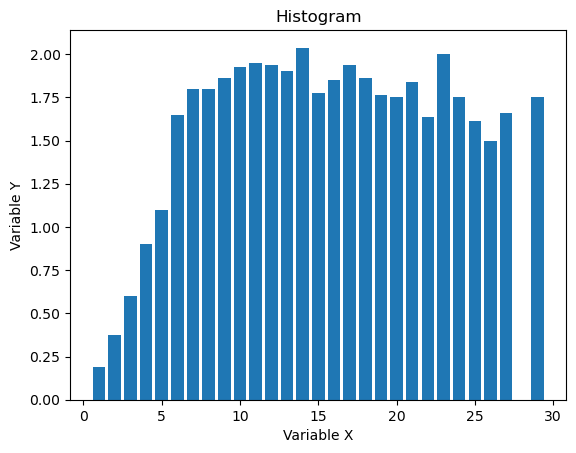

In [767]:
plot_bar_histogram(df['Age'], df['Length'])

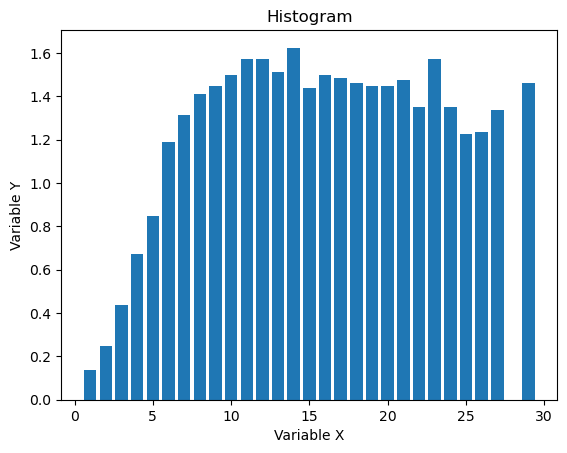

In [768]:
plot_bar_histogram(df['Age'], df['Diameter'])

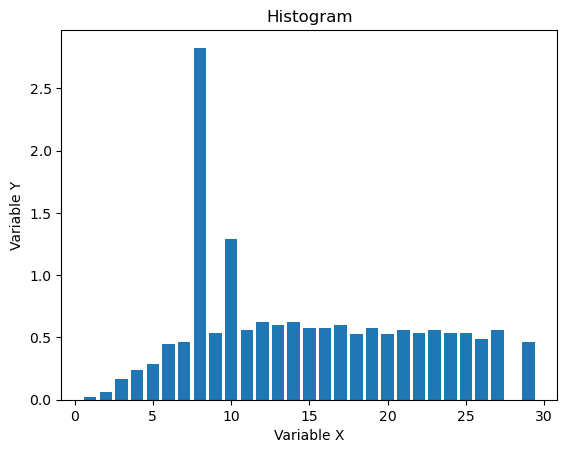

In [769]:
plot_bar_histogram(df['Age'], df['Height'])

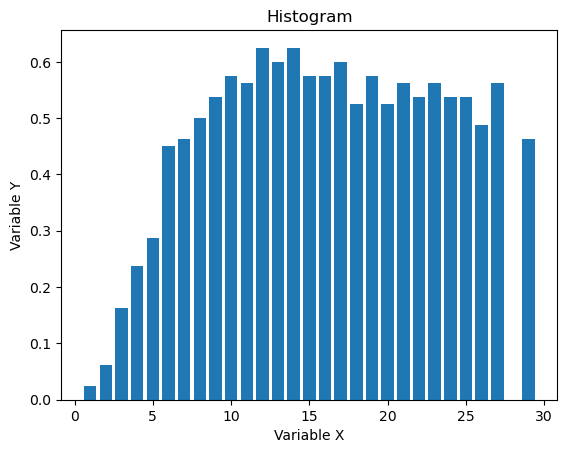

In [770]:
sorted_height = df['Height'].sort_values(ascending=False)
valores_exceptuados = sorted_height.iloc[2:]
media_exceptuada = valores_exceptuados.mean()

# Establece el umbral
umbral = 1# tu valor de umbral aquí

# Reemplaza los valores que superan el umbral con media_exceptuada
df['Height'] = df['Height'].apply(lambda x: x if x <= umbral else media_exceptuada)
plot_bar_histogram(df['Age'], df['Height'])

In [771]:
media_exceptuada

0.3484965304548959

In [772]:
valor_maximo = df['Height'].max()
valor_maximo

0.625

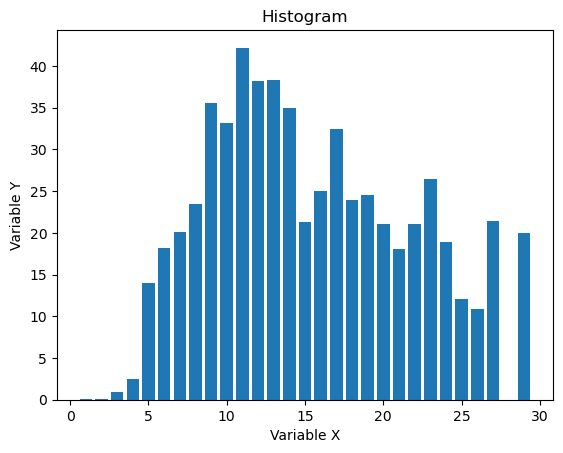

In [773]:
plot_bar_histogram(df['Age'], df['Shucked Weight'])

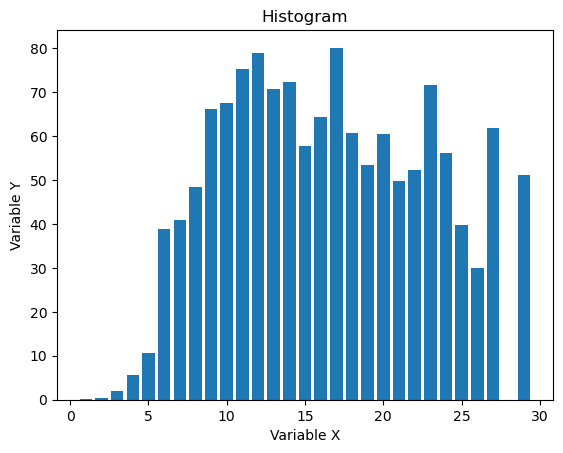

In [774]:
plot_bar_histogram(df['Age'], df['Weight'])

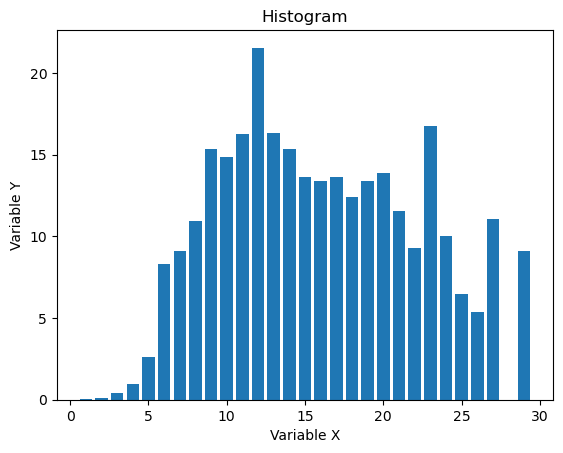

In [775]:
plot_bar_histogram(df['Age'], df['Viscera Weight'])

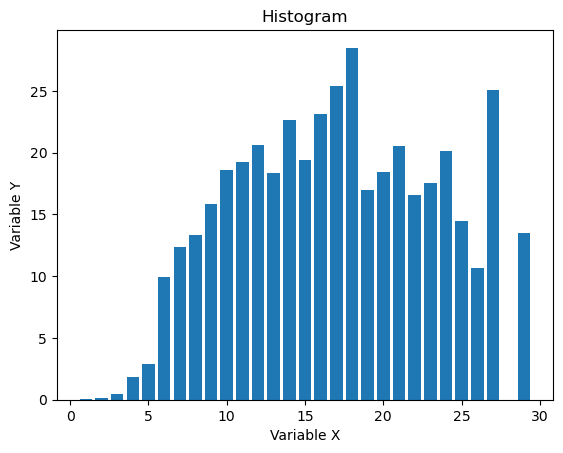

In [776]:
plot_bar_histogram(df['Age'], df['Shell Weight'])

In [777]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.348497,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.096013,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,0.625000,80.101512,42.184056,21.545620,28.491248,29.000000


In [778]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [779]:
df.Sex.unique().tolist()

['F', 'M', 'I']

In [780]:
df.Sex.value_counts()

Sex
M    1435
I    1233
F    1225
Name: count, dtype: int64

In [781]:
mapping = {'M': 1, 'I': 0, 'F': 1}
#MF: 0.44
#MI: -0.25
#FI: 0.18

df['Sex'] = df['Sex'].replace(mapping)
df.astype('int64')
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,0,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,1,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,0,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


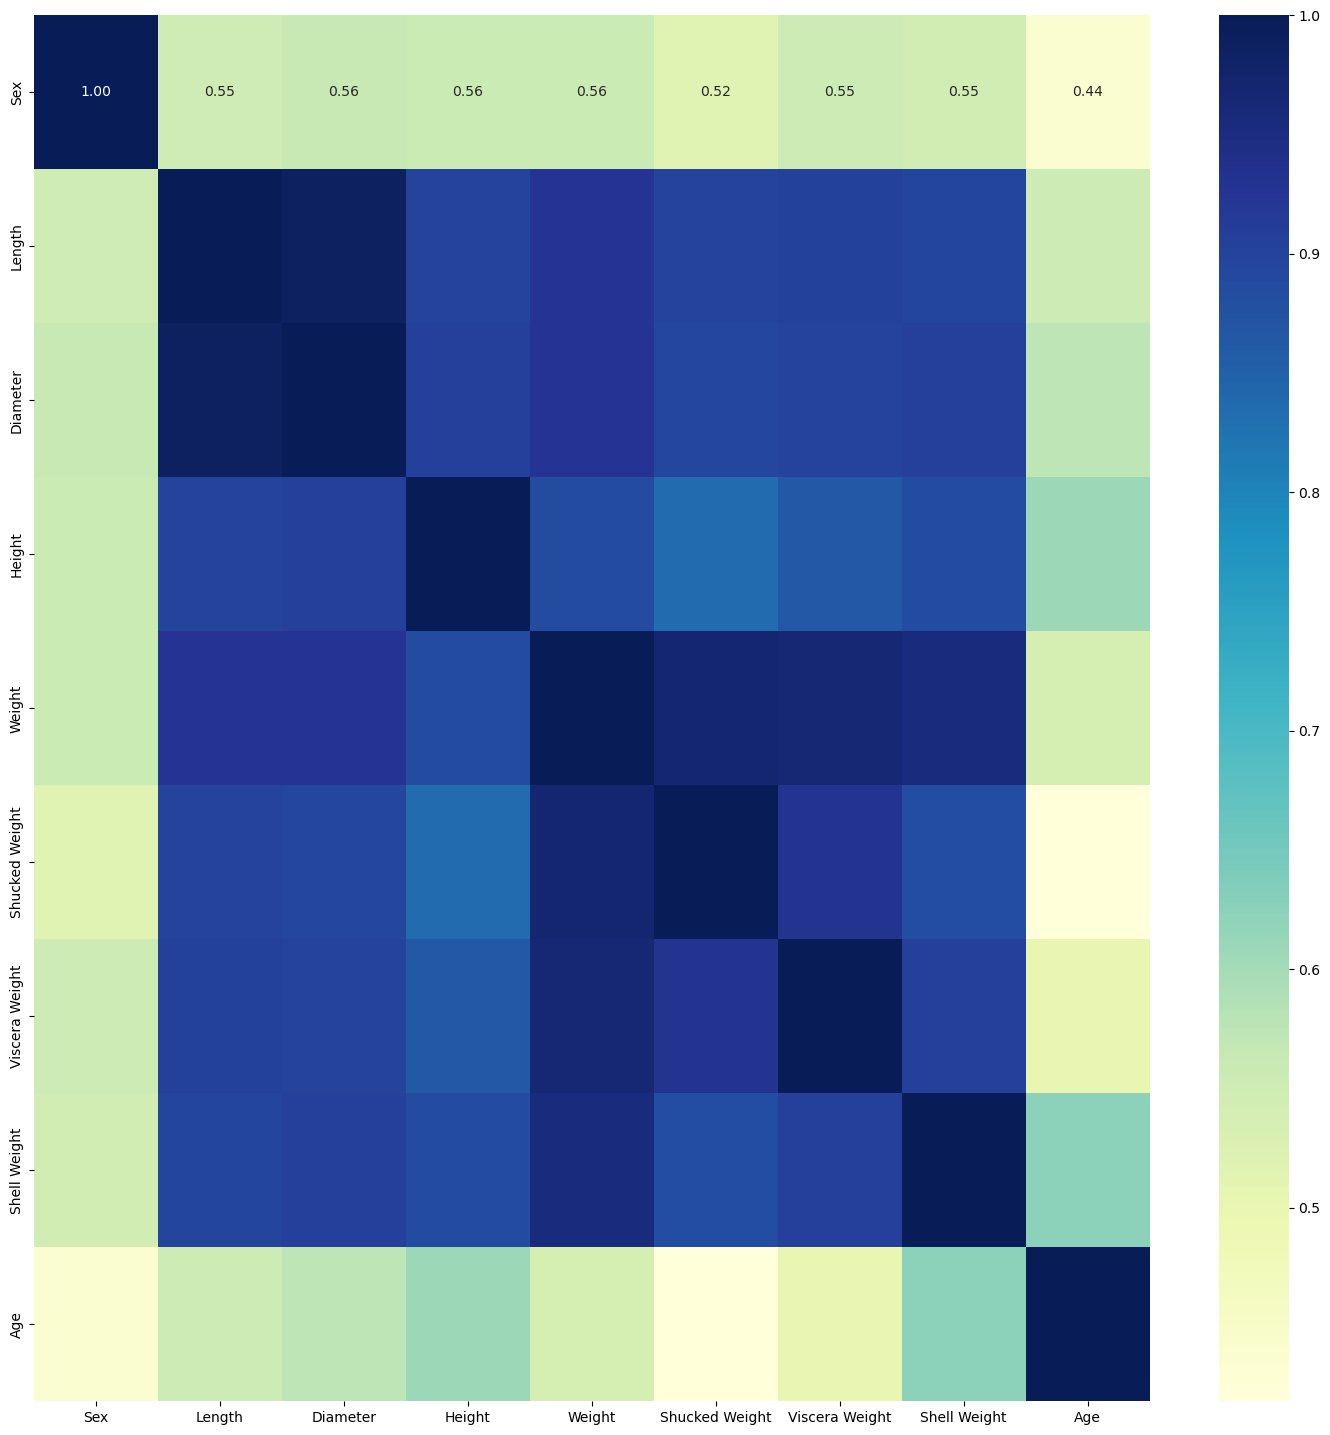

In [782]:
plt.figure(figsize = (18, 18)) 
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu", fmt='.2f')
plt.show()

# Volver variables numericas a los variables de sexo del cangrejo

In [783]:
def replace_bool(df):
    for col in df.columns:
        if df[col].dtype == 'bool':
            df[col] = df[col].replace({True: 1, False: 0})
df1.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,...,Height_less_50per,Height_hig50per,Weight_less_50per,Weight_hig50per,Shuck_Wei_less_50per,Shuck_Wei_hig50per,Visc_Wei_less50per,Visc_Wei_hig50per,She_Wei_less50per,She_Wei_hig50per
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1,0,...,0,1,0,1,0,1,0,1,0,1
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,0,...,1,0,1,0,1,0,1,0,1,0
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0,1,...,1,0,1,0,1,0,1,0,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,0,...,1,0,1,0,1,0,1,0,1,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0,1,...,1,0,1,0,1,0,1,0,1,0


In [784]:
df1.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,...,Height_less_50per,Height_hig50per,Weight_less_50per,Weight_hig50per,Shuck_Wei_less_50per,Shuck_Wei_hig50per,Visc_Wei_less50per,Visc_Wei_hig50per,She_Wei_less50per,She_Wei_hig50per
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,...,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791,0.314667,0.316722,...,0.498844,0.456460,0.499872,0.499615,0.500128,0.499872,0.499101,0.500899,0.503725,0.496275
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967,0.464443,0.465258,...,0.500063,0.498165,0.500064,0.500064,0.500064,0.500064,0.500063,0.500063,0.500050,0.500050
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividir las variables numericas en booleanas

In [785]:
df1['Length_less_50per'] = (df1['Length'] > 0) & (df1['Length'] < 1.10000)
df1['Length_hig50per'] = (df1['Length'] > 1.10000)

df1['Diameter_less_50per'] = (df1['Diameter'] > 0) & (df1['Diameter'] < 1.062500)
df1['Diameter_hig50per'] = (df1['Diameter'] > 1.062500)

df1['Height_less_50per'] = (df1['Height'] > 0) & (df1['Height'] < 0.362500)
df1['Height_hig50per'] = (df1['Height'] > 0.362500)

df1['Weight_less_50per'] = (df1['Weight'] > 0) & (df1['Weight'] < 22.792998)
df1['Weight_hig50per'] = (df1['Weight'] > 22.792998)

df1['Shuck_Wei_less_50per'] = (df1['Shucked Weight'] > 0) & (df1['Shucked Weight'] < 9.539607)
df1['Shuck_Wei_hig50per'] = (df1['Shucked Weight'] > 9.539607)

df1['Visc_Wei_less50per'] = (df1['Viscera Weight'] > 0) & (df1['Viscera Weight'] < 4.861939)
df1['Visc_Wei_hig50per'] = (df1['Viscera Weight'] > 4.861939)

df1['She_Wei_less50per'] = (df1['Shell Weight'] > 0) & (df1['Shell Weight'] < 6.662133)
df1['She_Wei_hig50per'] = (df1['Shell Weight'] > 6.662133)

In [786]:
replace_bool(df1)

In [787]:
df1.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,...,Height_less_50per,Height_hig50per,Weight_less_50per,Weight_hig50per,Shuck_Wei_less_50per,Shuck_Wei_hig50per,Visc_Wei_less50per,Visc_Wei_hig50per,She_Wei_less50per,She_Wei_hig50per
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,...,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791,0.314667,0.316722,...,0.498844,0.456460,0.499872,0.499615,0.500128,0.499872,0.499101,0.500899,0.503725,0.496275
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967,0.464443,0.465258,...,0.500063,0.498165,0.500064,0.500064,0.500064,0.500064,0.500063,0.500063,0.500050,0.500050
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [788]:
features = [
    "Age",
    "She_Wei_hig50per",
    "Height_hig50per",
    "Weight_hig50per",
    "Visc_Wei_hig50per",
    "Length_hig50per",
    "Diameter_hig50per",
    "Shuck_Wei_hig50per",
    "Sex_F",
    "Sex_M",
    "Shuck_Wei_less_50per",
    "Length_less_50per",
    "Diameter_less_50per",
    "Visc_Wei_less50per",
    "Sex_I",
    "Weight_less_50per",
    "Height_less_50per",
    "She_Wei_less50per"
]
df2 = df1[features]
correlations = df2.corr()['Age'].drop('Age').sort_values(ascending=False)
print(correlations)

She_Wei_hig50per        0.500005
Length_hig50per         0.483632
Height_hig50per         0.459302
Weight_hig50per         0.451750
Visc_Wei_hig50per       0.423711
Diameter_hig50per       0.406389
Shuck_Wei_hig50per      0.358757
Sex_F                   0.249282
Sex_M                   0.182339
Shuck_Wei_less_50per   -0.358757
Diameter_less_50per    -0.417076
Visc_Wei_less50per     -0.423711
Sex_I                  -0.437937
Weight_less_50per      -0.450807
Height_less_50per      -0.470299
Length_less_50per      -0.484946
She_Wei_less50per      -0.500005
Name: Age, dtype: float64


# Encontrar correlacion entre las variables

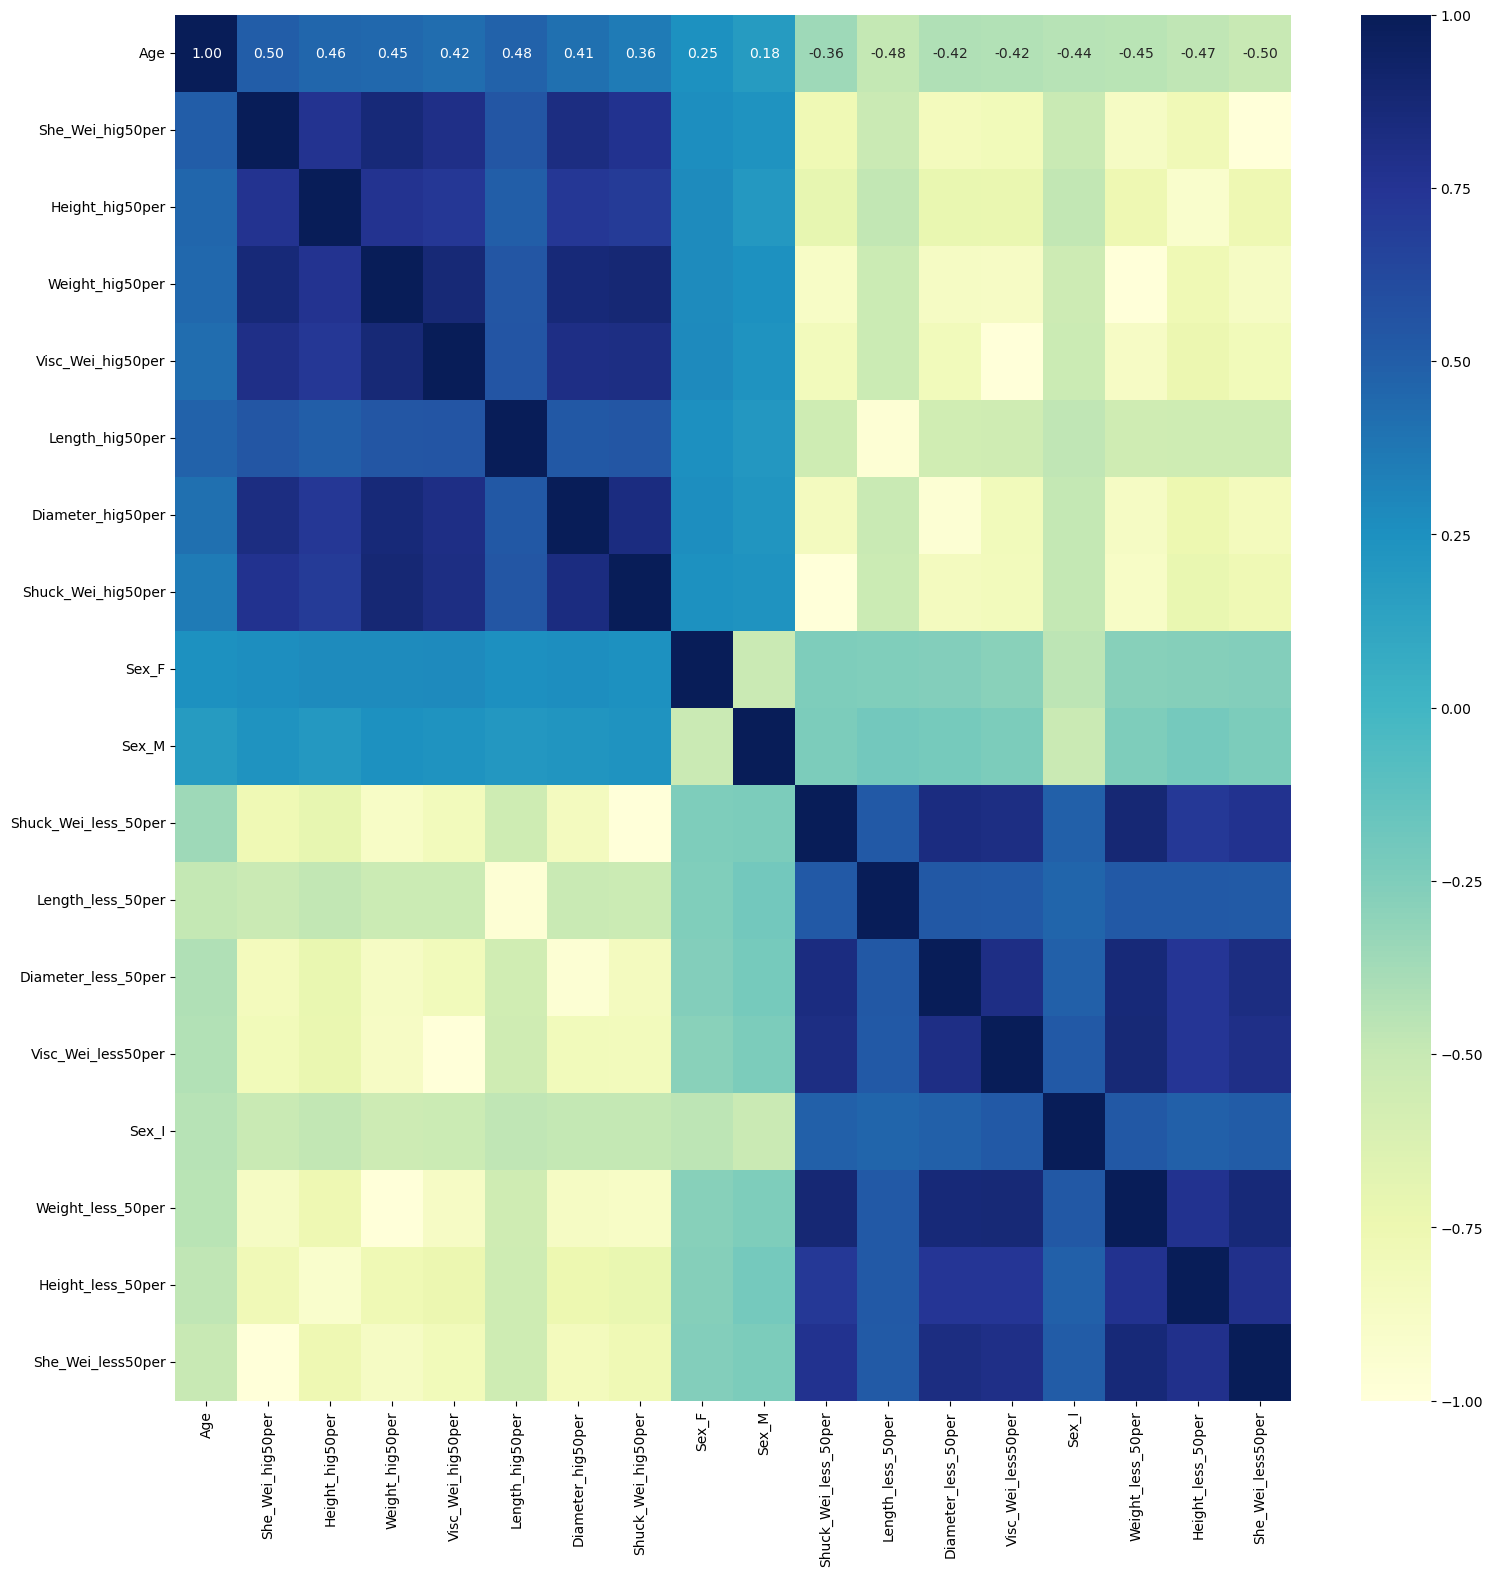

In [789]:
plt.figure(figsize = (18, 18)) 
sns.heatmap(df2.corr(), annot = True, cmap="YlGnBu", fmt='.2f')
plt.show()

In [790]:
correlations = df2.corr()['Age'].drop('Age').sort_values(ascending=False)
print(correlations)

She_Wei_hig50per        0.500005
Length_hig50per         0.483632
Height_hig50per         0.459302
Weight_hig50per         0.451750
Visc_Wei_hig50per       0.423711
Diameter_hig50per       0.406389
Shuck_Wei_hig50per      0.358757
Sex_F                   0.249282
Sex_M                   0.182339
Shuck_Wei_less_50per   -0.358757
Diameter_less_50per    -0.417076
Visc_Wei_less50per     -0.423711
Sex_I                  -0.437937
Weight_less_50per      -0.450807
Height_less_50per      -0.470299
Length_less_50per      -0.484946
She_Wei_less50per      -0.500005
Name: Age, dtype: float64


In [791]:
X = df2.drop(columns='Age')
y = df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Estandarizar los datos
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [792]:
lr = LinearRegression()
lr.fit(X_train, y_train)


edad_de_cangrejos_LR = lr.predict(X_test)

mse_LR = mean_squared_error(y_test, edad_de_cangrejos_LR)
mse_LR

2.0660095578326493e+20